## Stokes First Problem
&copy; Harishankar Manikantan, 2023

$~$

This module attempts to visualize the fluid velocity field associated with the Stokes first problem. A fluid of kinematic viscosity $\nu$ occupies the entire halfplane $y>0$, and the boundary at $y=0$ moves horizontally with constant velocity $U$ for time $t>0$. The solution to the corresponding diffusion equation can be derived using a similarity method, giving:

$$ \frac{u_x(y,t)}{U} = \mathrm{erfc}\left[ \frac{y}{2\sqrt{\nu t}} \right] $$

The error and complementary error functions look as follows. We are mostly interested in $\mathrm{erfc}(x)$ for positive $x$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

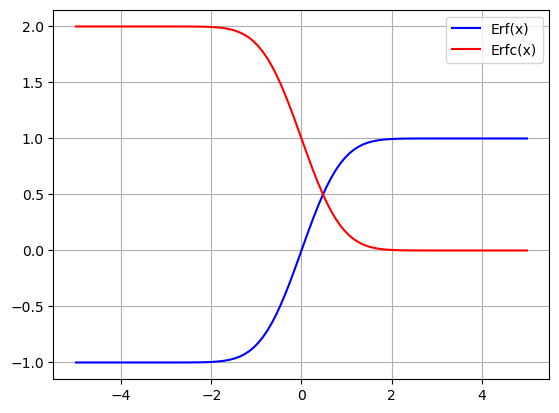

In [2]:
x=np.linspace(-5,5,100)
yerf=sp.erf(x)
yerfc=sp.erfc(x)
plt.plot(x,yerf,'b',label='Erf(x)')
plt.plot(x,yerfc,'r',label='Erfc(x)')
plt.grid('on')
plt.legend()
plt.show()

Self-similarity means that the same curve contains the solution for each value of $y$ and $t$. For example, increasing time merely decreases $\eta=y/\sqrt{\nu t}$ so has the effect of stretching the horizontal axis on the plot above. Same thing with hold $y$ and $t$ constant and increasing $\nu$: a more viscous fluid corresponds to the same self-simialr curve that is stretched more along the horizontal axis above.

We can plot the horizontal velocity (normalized by $U$) as a function of vertical position as different times to get a better sense of this 'stretching' effect and the flow field: 

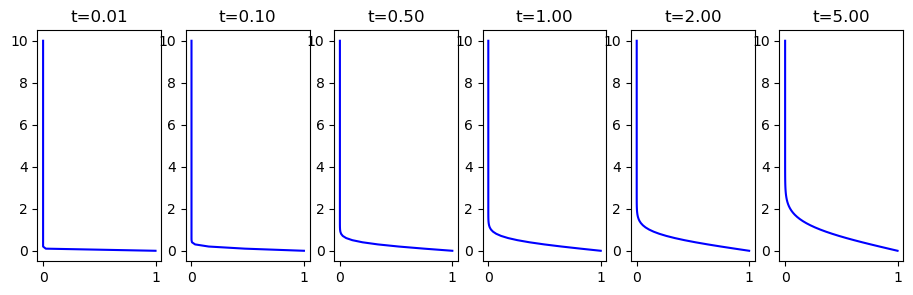

In [11]:
nu=0.1
y=np.linspace(0,10,100)

# plots 
plt.figure(figsize=(15,3))

t=np.array([0.01,0.1,0.5,1,2,5])

for i in range(len(t)):
    plt.subplot(1,8,i+1)
    ux=sp.erfc(y/2/np.sqrt(nu*t[i]))
    plt.plot(ux,y,'b')
    plt.title('t=%3.2f'%t[i])


plt.show()

Better still, we can plot velocity vectors at a few points to get a sense of the upward diffusion of horizontal momentum with time:

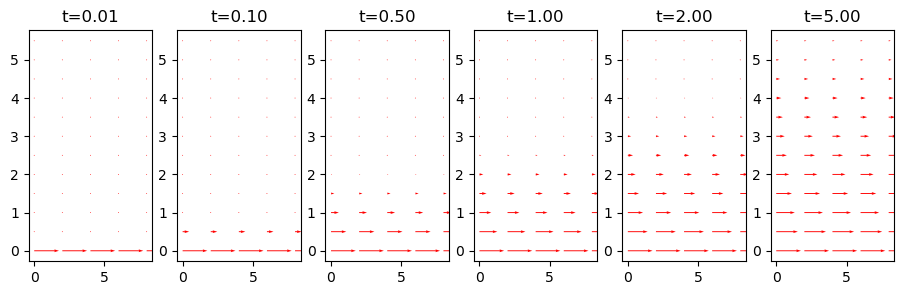

In [9]:
nu=1
X, Y = np.mgrid[:10:2,:6:0.5]

# plots 
plt.figure(figsize=(15,3))

t=np.array([0.01,0.1,0.5,1,2,5])

for i in range(len(t)):
    plt.subplot(1,8,i+1)
    U=sp.erfc(Y/2/np.sqrt(nu*t[i]))
    V=0.*Y
    plt.quiver(X, Y, U, V, color='r',scale=5)
    plt.title('t=%3.2f'%t[i])


plt.show()

Velocity profile with time control:

<IPython.core.display.Javascript object>


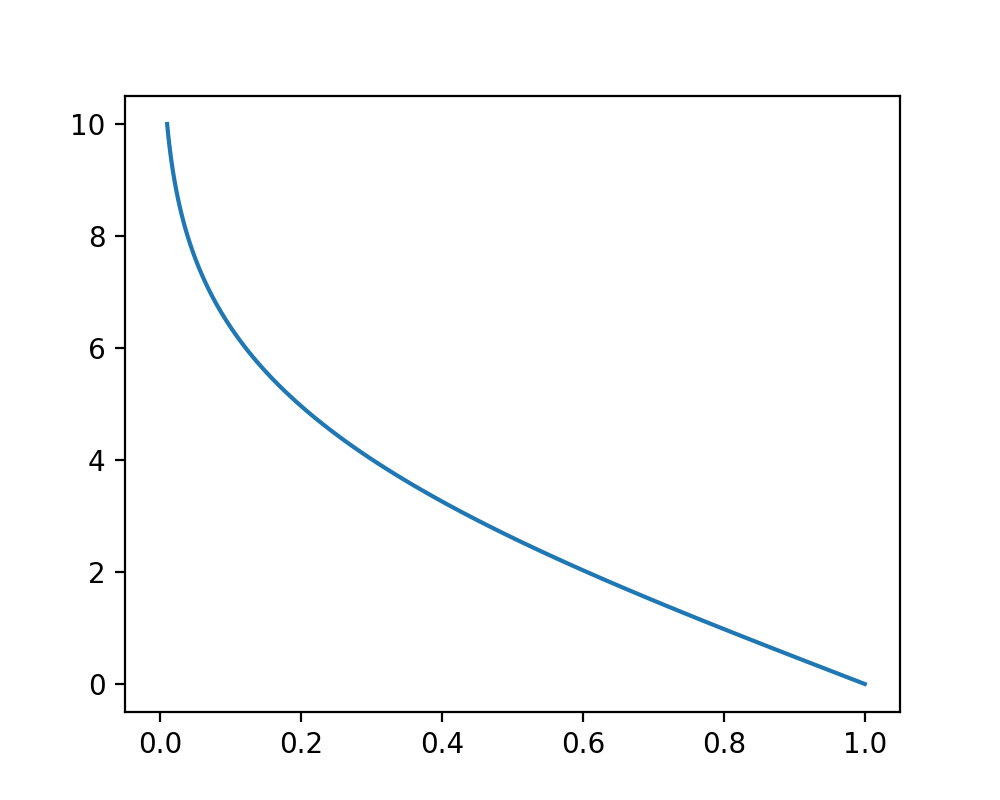

interactive(children=(FloatSlider(value=0.01, description='t', max=30.0, min=0.01, step=0.01), Output()), _dom…

In [4]:
%matplotlib notebook
from ipywidgets import *


x = np.linspace(0, 10,100)
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1, 1, 1)

nu=1
t=1
line, = ax.plot(sp.erfc(x/np.sqrt(nu*t)),x)

def update(t = 1.0):
    line.set_xdata(sp.erfc(x/np.sqrt(nu*t)))
    fig.canvas.draw_idle()

interact(update,t=widgets.FloatSlider(min=0.01, max=30, step=0.01, value=0.01));

Animation of horizontal velocity vectors 'diffusing' momentum upward:

<IPython.core.display.Javascript object>


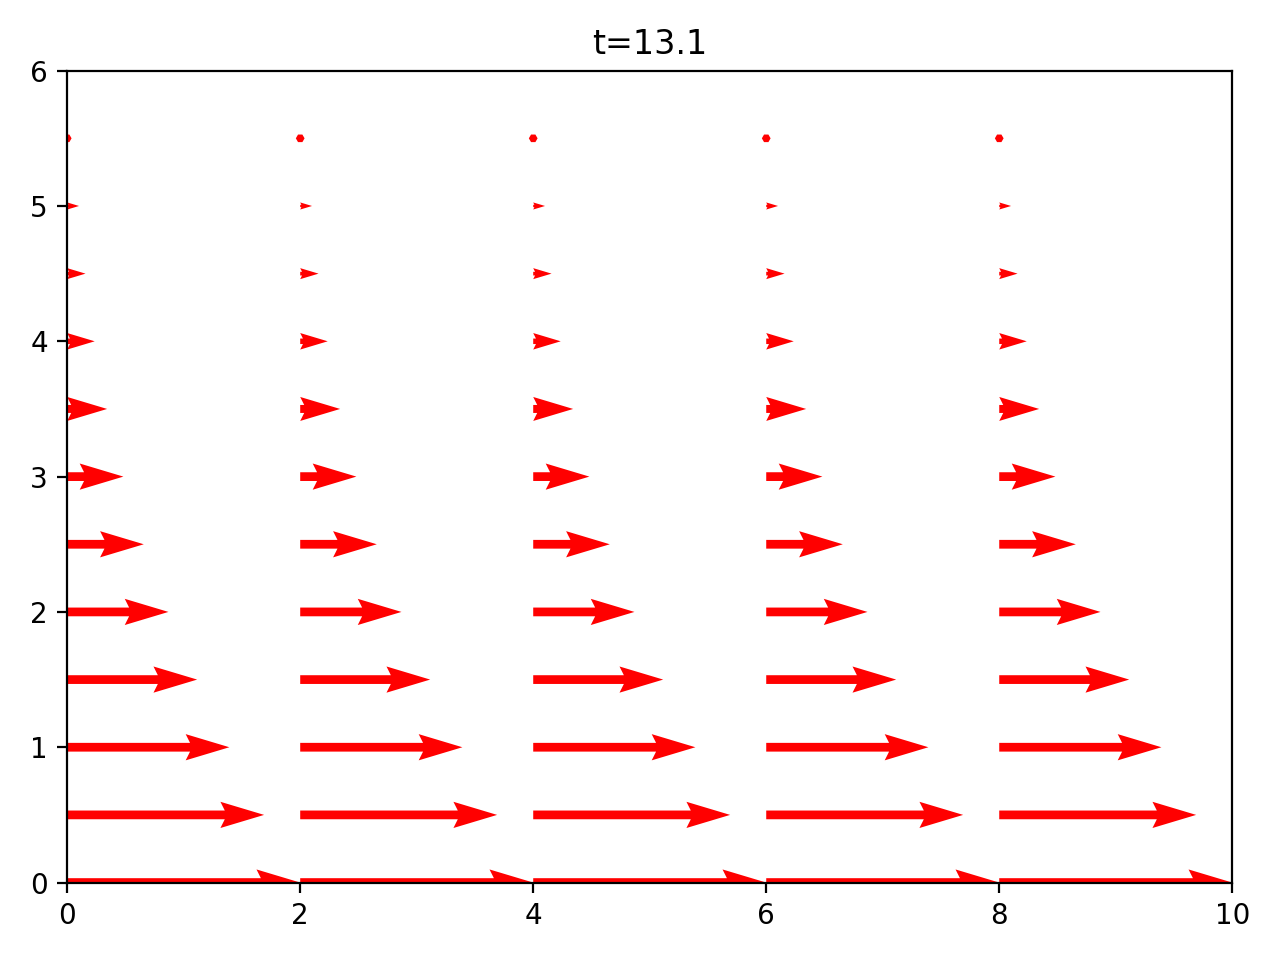

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook
nu=1
t=0.1
X, Y = np.mgrid[:10:2,:6:0.5]
U = sp.erfc(Y/np.sqrt(nu*t))
V = 0.*Y

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, color='r',scale=5)

ax.set_title(t)
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

def update_quiver(num, Q, Y,ax, t):
    # updates the horizontal velocity at each frame
    tnow=t + num*0.1
    U = sp.erfc(Y/np.sqrt(nu*tnow))
    V = 0.*Y
    Q.set_UVC(U,V)
    ax.set_title('t=%3.1f'%tnow)

    return Q,

anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, Y,ax, t),frames=np.arange(0.0, 1000, 5),
                               interval=50, blit=False, repeat=True)
fig.tight_layout()
#anim.save('flow.gif')
plt.show()

Similar methods of solving for an oscillating plate (Stokes' 2nd problem) gives:

$$ \frac{u_x(y,t)}{U} = e^{-\sqrt{\frac{\omega}{2\nu}}y}\cos\left(\omega t -\sqrt{\frac{\omega}{2\nu}}y\right), $$

where $\omega$ is the supplied oscillating frequency.

<IPython.core.display.Javascript object>


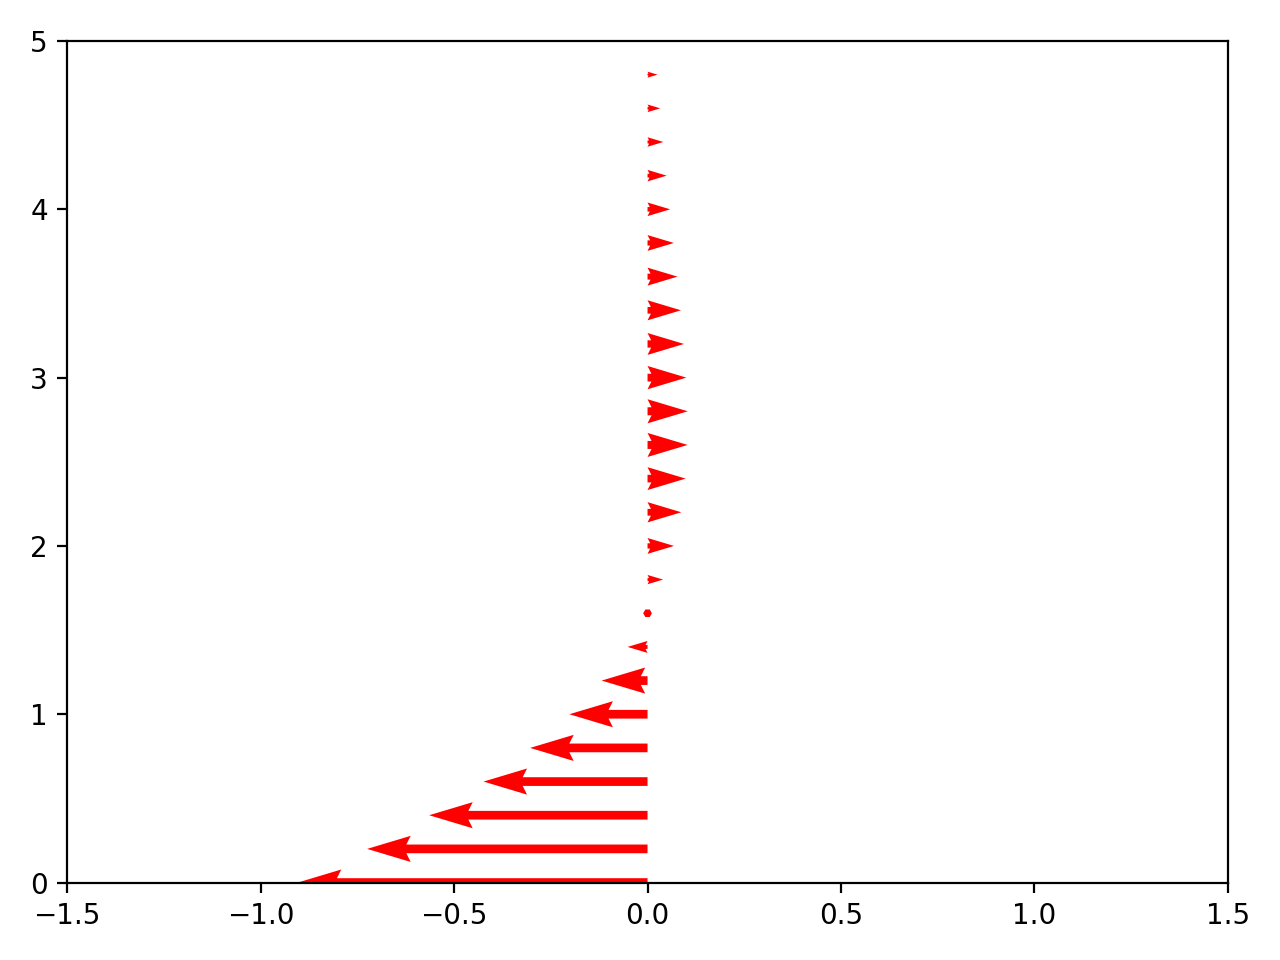

MovieWriter ffmpeg unavailable; using Pillow instead.


In [27]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook
nu=1
t=0.1
X, Y = np.mgrid[:1,:5:0.2]
w=1

U = np.exp(-np.sqrt(w/2/nu)*Y)*np.cos(w*t-np.sqrt(w/2/nu)*Y)
V = 0.*Y

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, color='r',scale=3)

#ax.set_title(t)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0, 5)

def update_quiver(num, Q, Y,ax, t):
    # updates the horizontal velocity at each frame
    tnow=t + num*0.05
    U = np.exp(-np.sqrt(w/2/nu)*Y)*np.cos(w*tnow-np.sqrt(w/2/nu)*Y)
    V = 0.*Y
    Q.set_UVC(U,V)
    #ax.set_title('t=%3.1f'%tnow)

    return Q,

anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, Y,ax, t),frames=np.arange(0.0, 200, 1),
                               interval=1, blit=False, repeat=True)
fig.tight_layout()
anim.save('flows2.gif')
plt.show()